In [ ]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv')

<ipython-input-13-c242cc7acb8e>:2: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/GirlsScriptOpenSource/StockOverflow/survey_results_public_2018.csv')


In [ ]:
# Display the first few rows of the dataframe
print(df.head())

   Respondent Hobby OpenSource         Country         Student  \
0           1   Yes         No           Kenya              No   
1           3   Yes        Yes  United Kingdom              No   
2           4   Yes        Yes   United States              No   
3           5    No         No   United States              No   
4           7   Yes         No    South Africa  Yes, part-time   

           Employment                                    FormalEducation  \
0  Employed part-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
1  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
2  Employed full-time                                   Associate degree   
3  Employed full-time           Bachelor’s degree (BA, BS, B.Eng., etc.)   
4  Employed full-time  Some college/university study without earning ...   

                                      UndergradMajor  \
0                          Mathematics or statistics   
1  A natural science (ex. biology,

In [ ]:
# Select relevant columns for technology trends analysis
tech_columns = ['LanguageWorkedWith', 'LanguageDesireNextYear', 'DatabaseWorkedWith', 'DatabaseDesireNextYear',
                'PlatformWorkedWith', 'PlatformDesireNextYear', 'FrameworkWorkedWith', 'FrameworkDesireNextYear']

In [ ]:
# Filter the dataset with selected columns
tech_df = df[tech_columns]

In [ ]:
# Display the first few rows of the filtered dataframe
print(tech_df.head())

                                 LanguageWorkedWith  \
0                        JavaScript;Python;HTML;CSS   
1                      JavaScript;Python;Bash/Shell   
2                                               NaN   
3  C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell   
4                C;C++;Java;Matlab;R;SQL;Bash/Shell   

                             LanguageDesireNextYear  \
0                        JavaScript;Python;HTML;CSS   
1                                         Go;Python   
2                                               NaN   
3  C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell   
4              Assembly;C;C++;Matlab;SQL;Bash/Shell   

                                  DatabaseWorkedWith  \
0  Redis;SQL Server;MySQL;PostgreSQL;Amazon RDS/A...   
1                         Redis;PostgreSQL;Memcached   
2                                                NaN   
3  SQL Server;Microsoft Azure (Tables, CosmosDB, ...   
4               SQL Server;PostgreSQL;Oracle;IBM Db2   

 

In [ ]:
# Function to plot technology trends
def plot_technology_trends(column, title):
    # Split the column values into individual technologies
    tech_series = tech_df[column].str.split(';').explode().value_counts()

    # Plot the top 10 technologies
    plt.figure(figsize=(12, 6))
    sns.barplot(x=tech_series.values[:10], y=tech_series.index[:10])
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('Technology')
    plt.show()

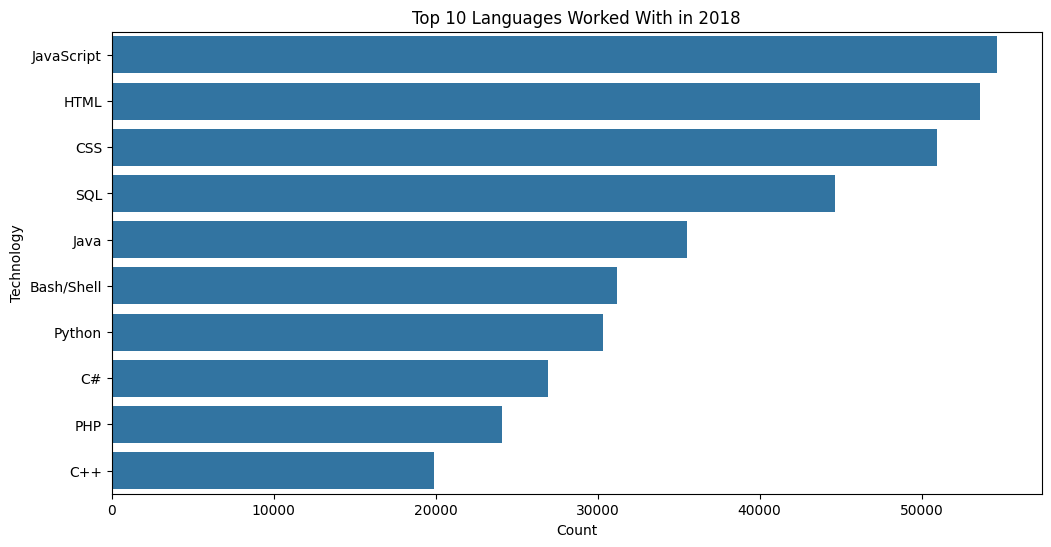

In [ ]:
# Plot trends for languages worked with
plot_technology_trends('LanguageWorkedWith', 'Top 10 Languages Worked With in 2018')

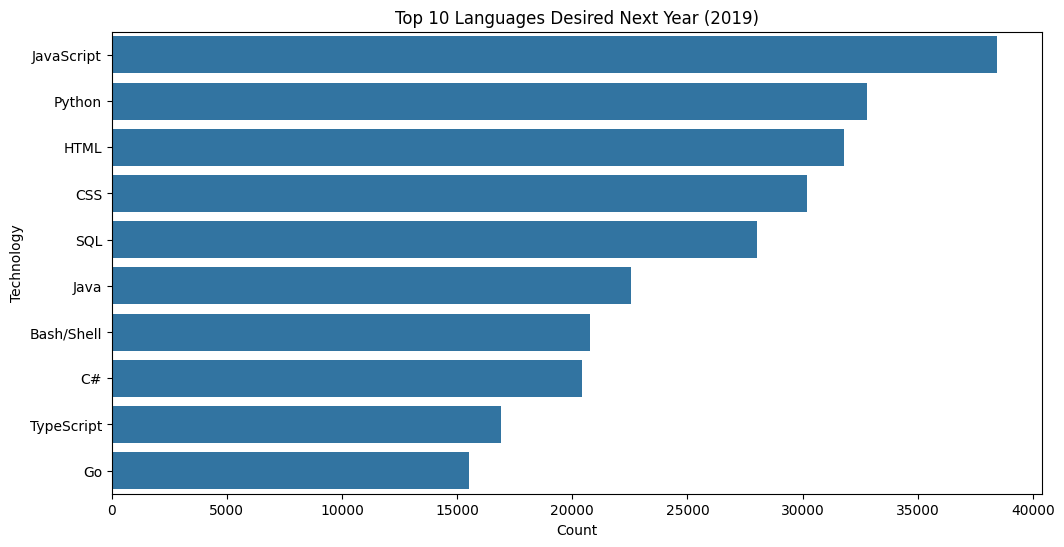

In [ ]:
# Plot trends for languages desired next year
plot_technology_trends('LanguageDesireNextYear', 'Top 10 Languages Desired Next Year (2019)')

In [ ]:
# Combine worked with and desired next year for comparison
combined_df = tech_df.melt(value_vars=['LanguageWorkedWith', 'LanguageDesireNextYear'],
                           var_name='Category', value_name='Technologies')

In [ ]:
# Split the technologies into individual entries
combined_df['Technologies'] = combined_df['Technologies'].str.split(';')
combined_df = combined_df.explode('Technologies')

In [ ]:
# Group by category and technology to get counts
trend_df = combined_df.groupby(['Category', 'Technologies']).size().reset_index(name='Count')

In [ ]:
# Pivot the data for comparison
trend_pivot = trend_df.pivot(index='Technologies', columns='Category', values='Count').fillna(0)

In [ ]:
# Calculate the change in preference
trend_pivot['Change'] = trend_pivot['LanguageDesireNextYear'] - trend_pivot['LanguageWorkedWith']

In [ ]:
# Sort by the change
trend_pivot = trend_pivot.sort_values(by='Change', ascending=False)

Category      LanguageDesireNextYear  LanguageWorkedWith  Change
Technologies                                                    
Go                             15529                5532    9997
Kotlin                         11992                3508    8484
Rust                            7857                1857    6000
Swift                           9708                6310    3398
TypeScript                     16896               13626    3270
Haskell                         5117                1961    3156
Scala                           6219                3420    2799
F#                              3752                1115    2637
Python                         32795               30359    2436
R                               7041                4813    2228


In [ ]:
# Display the top 10 technologies with the highest increase in preference
print(trend_pivot.head(10))

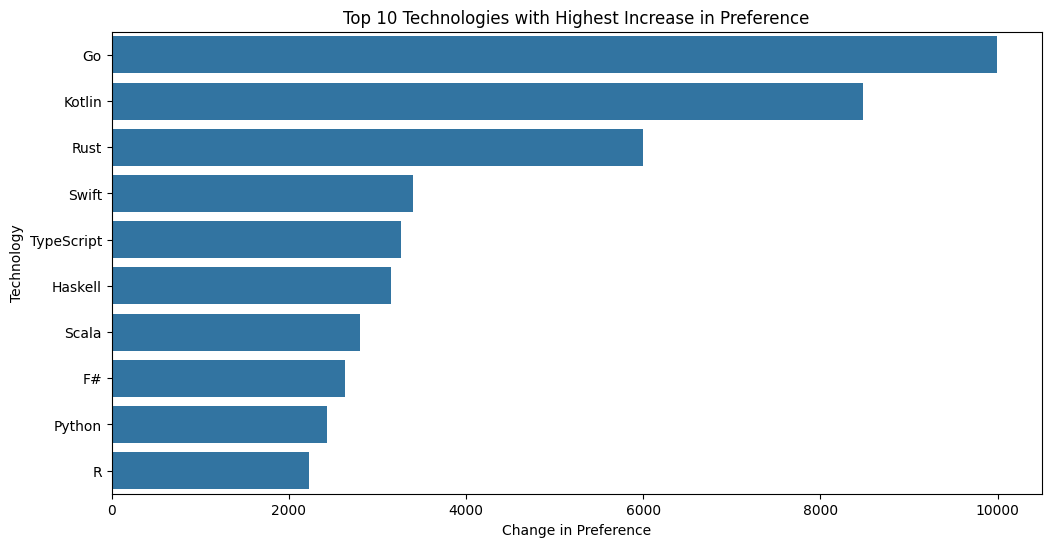

In [ ]:
# Plot the change in preference for the top 10 technologies
plt.figure(figsize=(12, 6))
sns.barplot(x=trend_pivot['Change'].head(10), y=trend_pivot.index[:10])
plt.title('Top 10 Technologies with Highest Increase in Preference')
plt.xlabel('Change in Preference')
plt.ylabel('Technology')
plt.show()